# Short Assignment 3: Mathematical Morphology for Color Image Processing
## SCC0251.2020.1 - Image Processing
### Prof. Dr. Moacir Ponti
### 10284952 - Vitor Gratiere Torres
https://github.com/vitorgt/SCC0251

In [1]:
# Imports
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [5]:
# r = imageio.imread(str(input()).rstrip()).astype(np.uint8)
r = imageio.imread(str("/home/ava/documents/classes/SCC0251_DIP/sa03/imagens/colors_noise.png").rstrip()).astype(np.uint8)
# k = int(input())
k = int(3)
# option = int(input())
option = int(1)

In [6]:
# Root Squared Error function
def rse(r, m):
    return np.sqrt(np.sum((m.astype(np.float)-r.astype(np.float))**2))

# Normalize function
def scale(image, c=0, d=255):
    a = np.min(image)
    b = np.max(image)
    return (image-a)*((d-c)/(b-a))+c

In [ ]:
# Function to apply filters on Fourier domain to images
def fft_filter(img, flt):

    # padding
    pad = (img.shape[0]//2)-flt.shape[0]//2
    fltpad = np.pad(flt, (pad, pad-1), "constant", constant_values=0)

    # transforming to fourier domain
    IMG = np.fft.fftn(img)
    FLT = np.fft.fftn(fltpad)

    # convoluting
    RES = np.multiply(FLT, IMG)

    # transforming back to space domain
    res = np.real(np.fft.fftshift(np.fft.ifftn(RES)))

    return res

In [ ]:
# Gaussian filter
h = gaussian_filter(k, sigma)

# denoising and normalizing
r_denoi = scale(fft_filter(r, h), d=maxr)

maxd = np.max(r_denoi)

# maybe the right way was to do this
# r_denoi = fft_filter(r, h)
# maxd = np.max(r_denoi)
# r_denoi = scale(r_denoi, d=maxr)

(-0.5, 255.5, 255.5, -0.5)

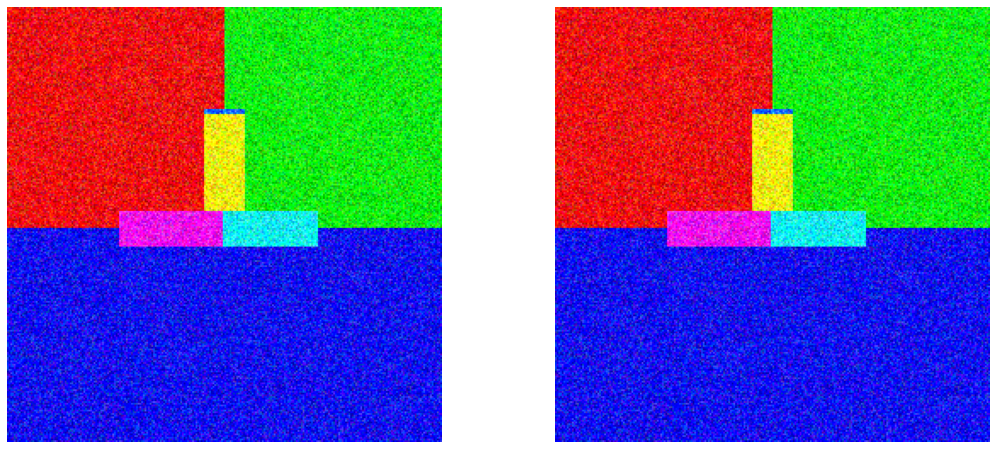

In [7]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.imshow(r, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(r, cmap="gray")
plt.axis('off')

In [ ]:
def clsf(g, h, p, gamma):

    # padding
    pad = (g.shape[0]//2)-h.shape[0]//2
    hpad = np.pad(h, (pad, pad-1), "constant", constant_values=0)

    # padding
    pad = (g.shape[0]//2)-p.shape[0]//2
    ppad = np.pad(p, (pad, pad-1), "constant", constant_values=0)

    # transforming to fourier domain
    G = np.fft.fftn(g)
    H = np.fft.fftn(hpad)
    P = np.fft.fftn(ppad)

    # restoring the blur using the Constrained Least Squares method
    F_hat = (np.conj(H) / (np.abs(H)**2 + gamma*np.abs(P)**2)) * G

    # transforming back to space domain
    f_hat = np.real(np.fft.fftshift(np.fft.ifftn(F_hat)))

    return f_hat

In [ ]:
# Laplacian operator
p = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]])

# deblurring and normalizing
r_denoi_deblur = scale(clsf(r_denoi, h, p, gamma), d=maxd)

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(131)
plt.imshow(r, cmap="gray")
plt.axis('off')
plt.subplot(132)
plt.imshow(r_denoi, cmap="gray")
plt.axis('off')
plt.subplot(133)
plt.imshow(r_denoi_deblur, cmap="gray")
plt.axis('off')

In [ ]:
print("{:.1f}".format(np.std(r_denoi_deblur)))